In [1]:
import os
from re import search
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\cmdresearch'

In [1]:
import astropy
from astropy.io import fits
import astropy.visualization as vis
import numpy as np

# from astropy.cosmology import WMAP9 as wmap
# from astropy.cosmology import Planck18 as planck
import pandas as pd

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import time
from IPython.display import display, HTML, Image, clear_output


### Initial exploration

#### Ka1 For the First Year of Data

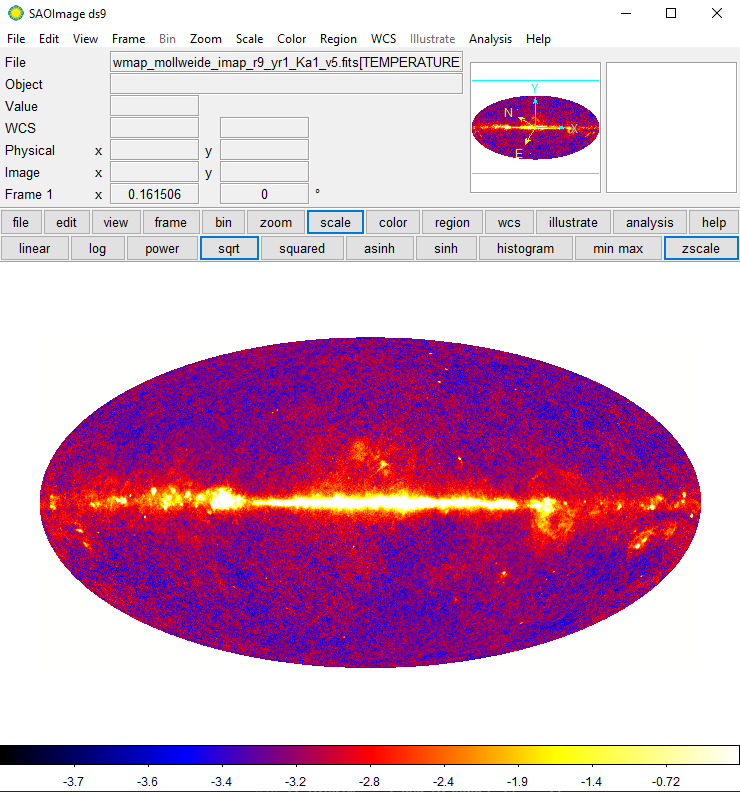

In [2]:
Image('../images/my first pic of cmb!.png', width=400)

This file contains a WMAP Intensity (I) Res 9 skymap for the
differencing assembly indicated by the DA keyword.
The first year of data went into the map.
Pixel noise in mK may be evaluated from the Nobs field using
the expression:
sigma = sigma0/sqrt(Nobs)
sigma0 applies to the entire map and is a scalar value listed
in the header.


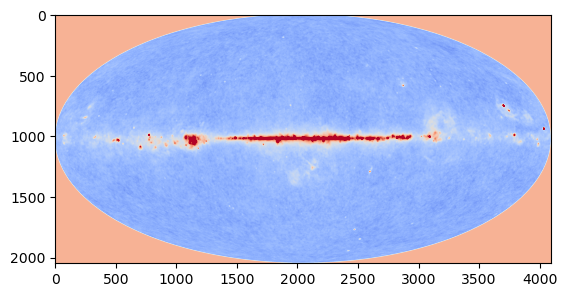

In [6]:
# opening the fits file
with fits.open('wmap_data/Ka1 Broadband/wmap_mollweide_imap_r9_yr1_Ka1_v5.fits') as hdul:
    print(hdul[0].header['COMMENT'])
    datak1a = hdul[1].data

# Convert data to float type and replace NaN values
datak1a = np.nan_to_num(datak1a.astype(float))

# normalizing the image
normk1a = vis.ImageNormalize(datak1a, interval=vis.ZScaleInterval(), stretch=vis.SqrtStretch())

# plotting the image
plt.imshow(datak1a, cmap='coolwarm', norm=normk1a)
plt.show()
    

#### K1 For the Ninth Year of Data

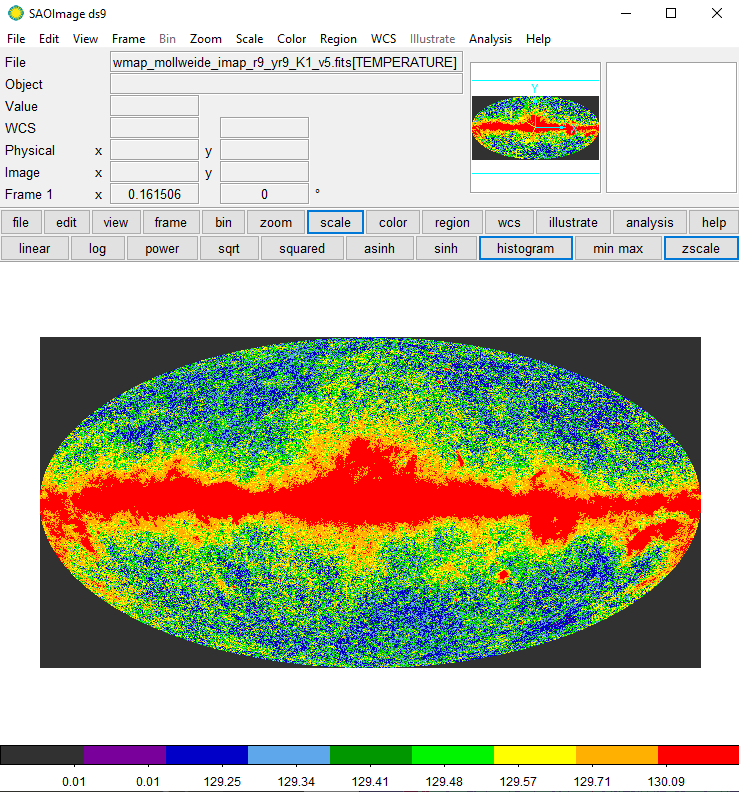

In [ ]:
Image('../images/second pic of cmb.png', width=400)

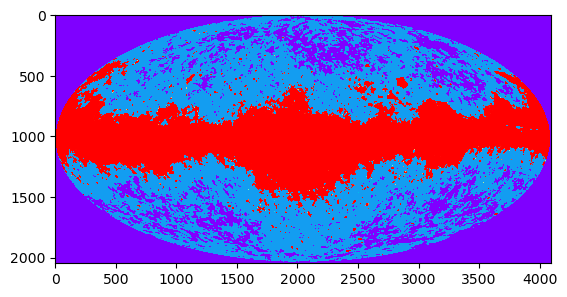

In [7]:
with fits.open('wmap_data/K1 Broadband/wmap_mollweide_imap_r9_yr9_K1_v5.fits') as hdul:
    datak1 = hdul[1].data

datak1 = np.nan_to_num(datak1.astype(float))
vmin, vmax = np.percentile(datak1, [39, 85])
normk1 = vis.ImageNormalize(vmin=vmin, vmax=vmax, stretch=vis.HistEqStretch(datak1))
plt.imshow(datak1, cmap='rainbow', norm=normk1)
plt.show()

#### K1 For the First Year of Data

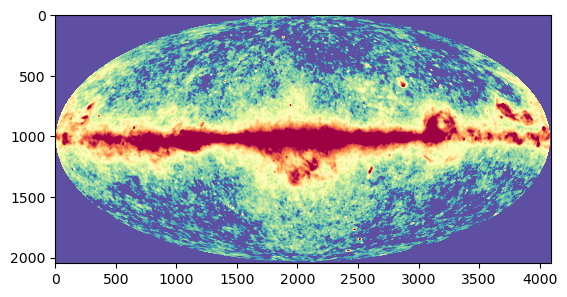

(2048, 4096)


In [8]:
with fits.open('wmap_data/K1 Broadband/wmap_mollweide_imap_r9_yr1_K1_v5.fits') as hdul:
    datak1 = hdul[1].data

datak1 = np.nan_to_num(datak1.astype(float))
vmin, vmax = np.percentile(datak1, [40, 96])
normk1 = vis.ImageNormalize(datak1, vmin=vmin, vmax=vmax, interval=vis.ZScaleInterval(), stretch=vis.SqrtStretch())
plt.imshow(datak1, cmap='Spectral_r', norm=normk1, interpolation='hermite')
plt.show()
print(datak1.shape) # getting resolution, may not be high enough?

#### Q1 For the Ninth Year of Data

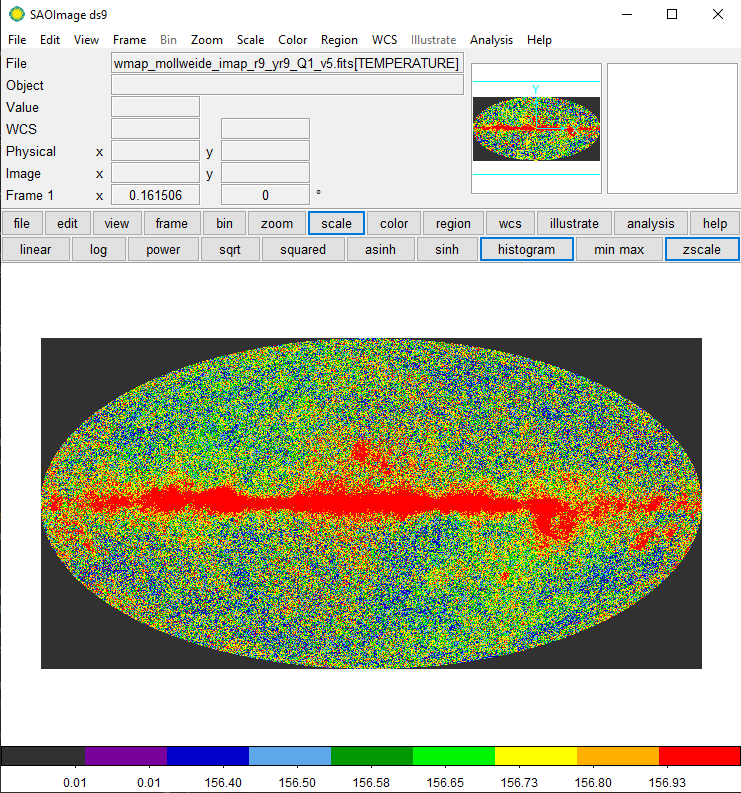

In [ ]:
Image('../images/third pic of cmb.png', width=400)

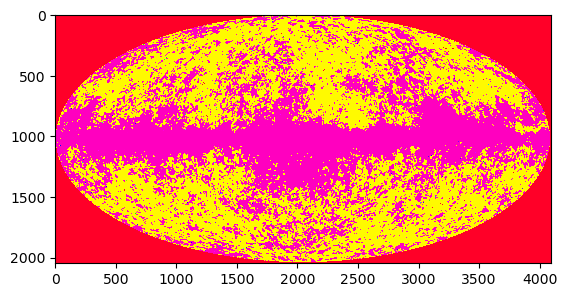

In [9]:
with fits.open('wmap_data/Q1 Broadband/wmap_mollweide_imap_r9_yr9_Q1_v5.fits') as hdul:
    dataq1 = hdul[1].data

dataq1 = np.nan_to_num(dataq1.astype(float))
vmin, vmax = np.percentile(dataq1, [28, 83])
normq1 = vis.ImageNormalize(vmin=vmin, vmax=vmax, stretch=vis.HistEqStretch(dataq1))
plt.imshow(dataq1, cmap='gist_rainbow', norm=normq1)
plt.show()

### comparing K1 data from year 1 to 9

#### still comparison

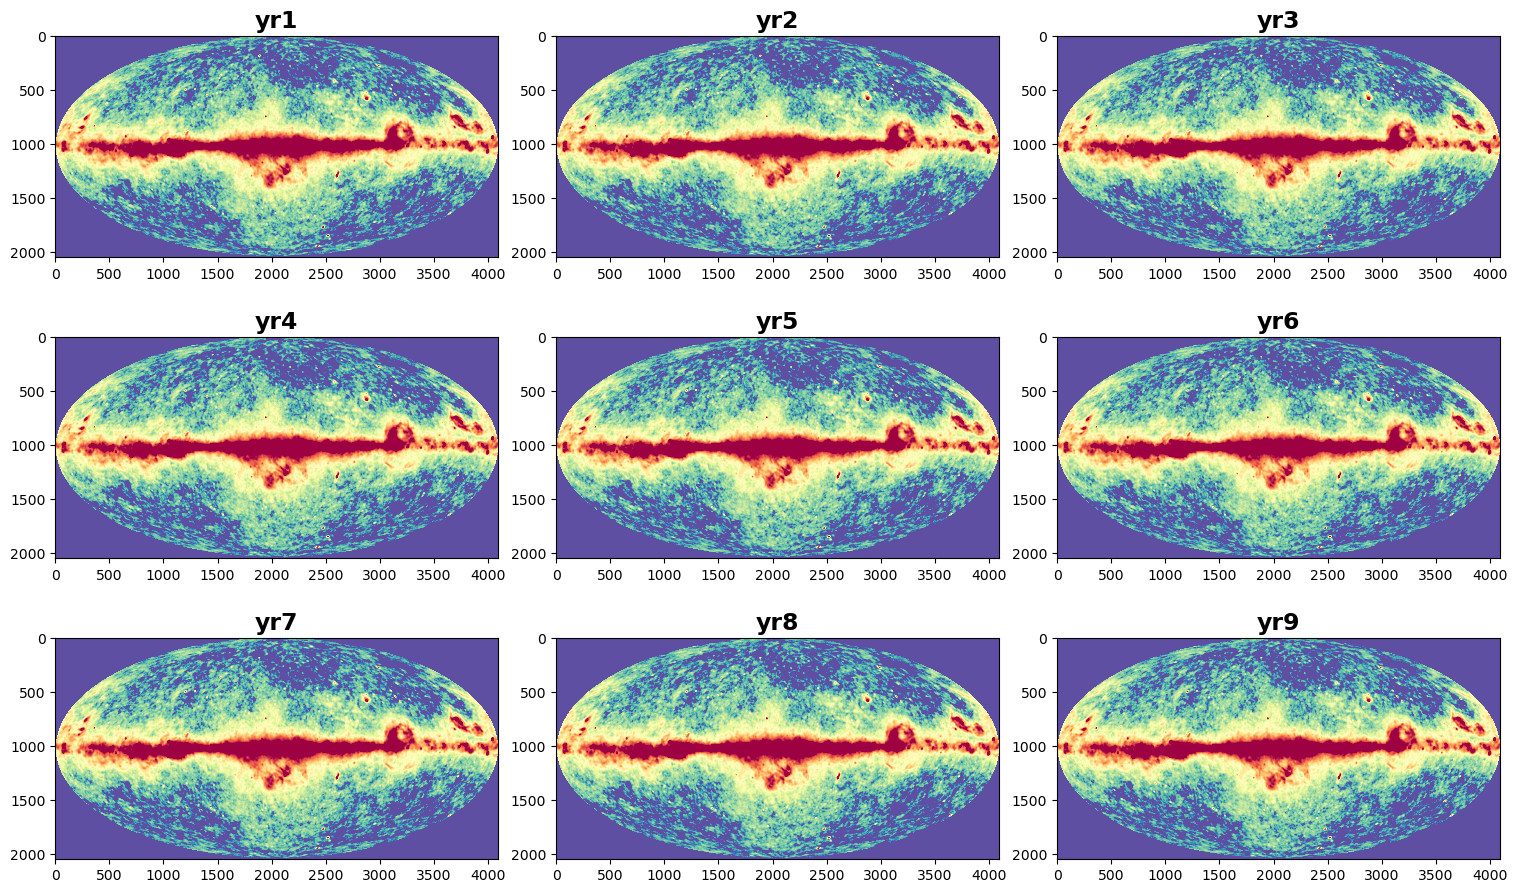

In [68]:
k1_path = os.path.relpath("wmap_data/K1 Broadband")
k1_files = [os.path.join(k1_path, f) for f in os.listdir(k1_path) if f.endswith('.fits')]

fig, axs = plt.subplots(3, 3, figsize=(15, 9))

for i, file in enumerate(k1_files):
    # opening file in the K1 Broadband folder
    with fits.open(file) as hdul:
        data = hdul[1].data

    # converting data to float type and normalizing
    data = np.nan_to_num(data.astype(float))
    vmin, vmax = np.percentile(data, [40, 96])
    norm = vis.ImageNormalize(data, vmin=vmin, vmax=vmax, interval=vis.ZScaleInterval(), stretch=vis.SqrtStretch())

    # plotting the image
    ax = axs[i // 3, i % 3]
    ax.set_title(search('yr\d+', file).group(), weight='bold', fontsize=17)
    ax.imshow(data, cmap='Spectral_r', norm=norm, interpolation='hermite')

plt.tight_layout(pad=0, h_pad=0.2, w_pad=0.2)
plt.show()

#### mini animation

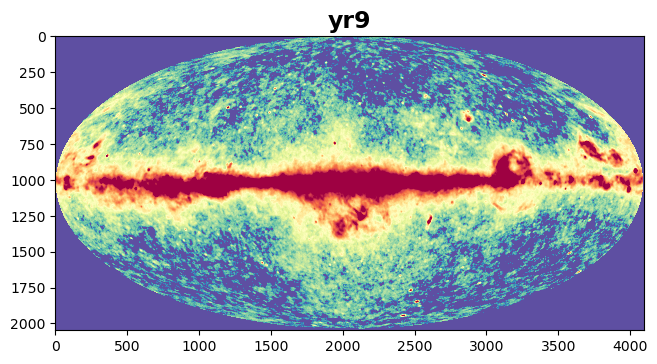

In [74]:
k1_path = os.path.relpath("wmap_data/K1 Broadband")
k1_files = [os.path.join(k1_path, f) for f in os.listdir(k1_path) if f.endswith('.fits')]

for i, file in enumerate(k1_files):
    # opening file in the K1 Broadband folder
    with fits.open(file) as hdul:
        data = hdul[1].data

    # converting data to float type and normalizing
    data = np.nan_to_num(data.astype(float))
    vmin, vmax = np.percentile(data, [40, 96])
    norm = vis.ImageNormalize(data, vmin=vmin, vmax=vmax, interval=vis.ZScaleInterval(), stretch=vis.SqrtStretch())

    # plotting the image
    fig, ax = plt.subplots()
    ax.set_title(search('yr\d+', file).group(), weight='bold', fontsize=17)
    ax.imshow(data, cmap='Spectral_r', norm=norm, interpolation='hermite')
    plt.tight_layout(pad=0, h_pad=0, w_pad=2)

    # Show the plot
    plt.show()

    # Pause for a moment
    time.sleep(0.1)

    # Clear the output if it's not the last file
    if file != k1_files[-1]:
        clear_output(wait=True)